# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Импортируем библиотеки</font>
</div>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import warnings
from sklearn.linear_model import LinearRegression 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats

from scipy import stats as st

In [2]:
df1=pd.read_csv('/datasets/geo_data_0.csv')
df2=pd.read_csv('/datasets/geo_data_1.csv')
df3=pd.read_csv('/datasets/geo_data_2.csv')

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Выводим датафреймы на экран</font>
</div>

In [3]:
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Удалим во всех трех датафреймах столбец id, т.к он не несет ценности с точки зрения обучения модели</font>
</div>

In [5]:
df1=df1.drop('id',axis=1)


In [6]:
df2=df2.drop('id',axis=1)
df3=df3.drop('id',axis=1)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Проверим распределение целевого признака во всех датафреймах</font>
</div>

array([[<AxesSubplot:title={'center':'product'}>]], dtype=object)

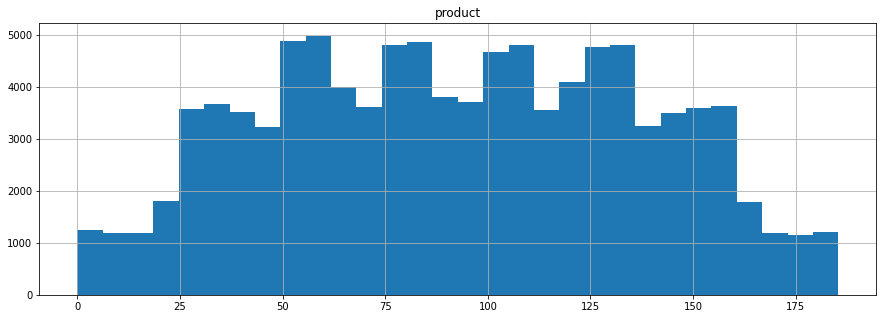

In [7]:
df1.hist(['product'],bins=30,figsize=(15,5))

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fe26720e340>, <matplotlib.lines.Line2D object at 0x7fe26720e6a0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe26720ea00>, <matplotlib.lines.Line2D object at 0x7fe26720ed60>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fe2671f8fa0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe26721a100>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe26721a460>], 'means': []})

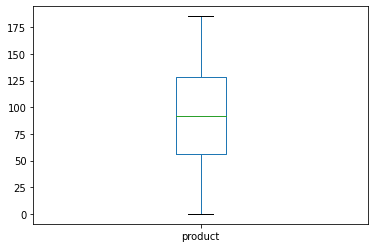

In [8]:
df1['product'].plot.box(return_type='both')

array([[<AxesSubplot:title={'center':'product'}>]], dtype=object)

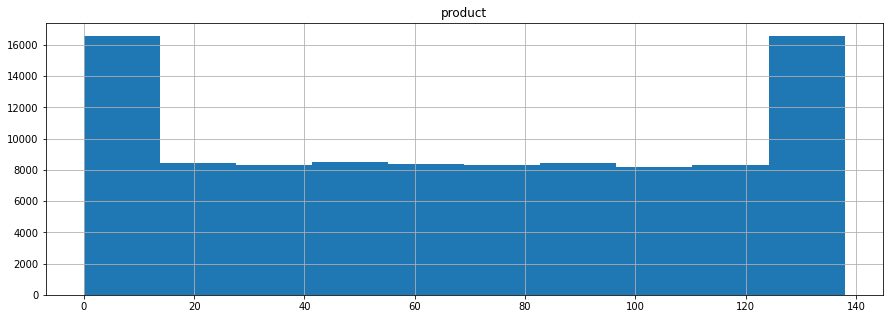

In [9]:
df2.hist(['product'],figsize=(15,5))

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fe2670ffd00>, <matplotlib.lines.Line2D object at 0x7fe26710c0a0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe26710c400>, <matplotlib.lines.Line2D object at 0x7fe26710c760>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fe2670ff9a0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe26710cac0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe26710ce20>], 'means': []})

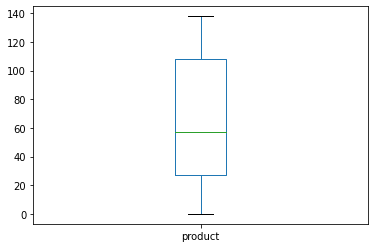

In [10]:
df2['product'].plot.box(return_type='both')

array([[<AxesSubplot:title={'center':'product'}>]], dtype=object)

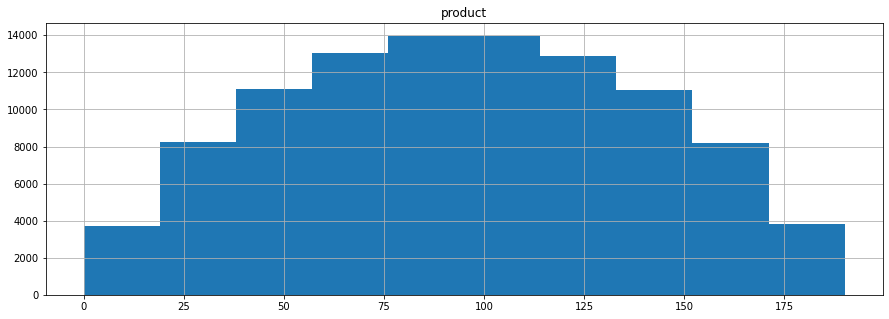

In [11]:
df3.hist(['product'],figsize=(15,5))

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fe2671338e0>, <matplotlib.lines.Line2D object at 0x7fe26714c850>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe26715a0a0>, <matplotlib.lines.Line2D object at 0x7fe26715a9a0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fe267192700>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe26715ac10>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe2671a5340>], 'means': []})

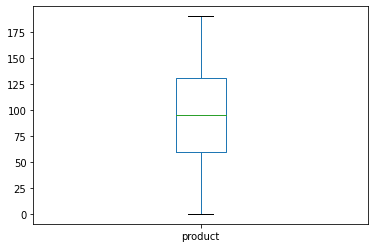

In [12]:
df3['product'].plot.box(return_type='both')

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Данные в пределах нормы, выбросов нет</font>
</div>

## Обучение и проверка модели

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>В какой-то момент стало ясно, что можно было бы написать одну большую функцию для трех датафреймов. На данный момент мне, к сожалению, не хватило опыта. В частности, непонятно, как дать Python понять, к какому именно датафрейму обращаюсь(к первому, второму, третьему)</font>
</div>

In [13]:
df1_target=df1['product']
df1_features=df1.drop(['product'],axis=1)

In [14]:
features_train_df1, features_valid_df1, target_train_df1, target_valid_df1 = train_test_split(df1_features, df1_target, 
                                                    train_size=0.75, 
                                                    random_state=12345)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Cтандартизирую данные с помощью StandardScaler</font>
</div>

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(features_train_df1)

StandardScaler()

In [17]:
features_train_df1 = pd.DataFrame(scaler.transform(features_train_df1), index=features_train_df1.index, columns=features_train_df1.columns)
features_valid_df1 = pd.DataFrame(scaler.transform(features_valid_df1), index=features_valid_df1.index, columns=features_valid_df1.columns)

In [18]:
model1 = LinearRegression() 
model1.fit(features_train_df1, target_train_df1) 
model1.score(features_valid_df1, target_valid_df1) 

0.27994321524487786

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Наблюдаем очень низкую точность в 28%</font>
</div>

In [19]:
predictions_df1=model1.predict(features_valid_df1)

In [20]:
predictions_df1

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

In [21]:
print('Средний запас предсказанного сырья',predictions_df1.mean())
print('RMSE модели:',mean_squared_error(target_valid_df1,predictions_df1))
print("R2 =", r2_score(target_valid_df1,predictions_df1))

Средний запас предсказанного сырья 92.59256778438035
RMSE модели: 1412.2129364399243
R2 = 0.27994321524487786


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>RMSE достаточно большой, потому проверим дисперсию в исходных данных. Большой RMSE здесь не свидетельствует о плохой точности, поскольку значения целевого признака достаточно большие, а значит, и ошибка в абсолютном смысле тоже будет велика.</font>
</div>

In [22]:
dispersion=print(df1.var()['product'])

1961.4881626155964


Среднеквадратичная ошибка:

In [23]:
print(1961**0.5)

44.28317965096906


In [24]:
df1['product'].mean()

92.50000000000001


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Среднеквадратическое отклонение=44,2, а математическое ожидание = 92,5. В целом, все данные находятся в пределах трех сигм(т.е правило трех сигм выполняется).</font>
</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Проверим, является ли максимальное значение статистическим выбросом.Здесь применял тест Граббса</font>
</div>

In [25]:
def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations / std_dev
    print(f"Значение статистики: {Gcal}")
    return Gcal, max_ind

def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print(f"Критическое значение: {critical_value}")
    return critical_value

def check_G_values(Gs, Gc, inp, max_index):
    if Gs > Gc:
        print(f"{inp[max_index]} является выбросом")
    else:
        print(f"{inp[max_index]} не является выбросом")

In [26]:
Gcritical = calculate_critical_value(len(df1['product']), 0.05)
Gstat, max_index = grubbs_stat(df1['product'])
check_G_values(Gstat, Gcritical, df1['product'], max_index)


Критическое значение: 5.0260079503784905
Значение статистики: 2.0968064163503355
185.3643474222929 не является выбросом


Второй регион

In [27]:
df2_target=df2['product']
df2_features=df2.drop(['product'],axis=1)
features_train_df2, features_valid_df2, target_train_df2, target_valid_df2 = train_test_split(df2_features, df2_target, 
                                                    train_size=0.75, 
                                                    random_state=12345)

In [28]:
model2 = LinearRegression() 
model2.fit(features_train_df2, target_train_df2) 
model2.score(features_valid_df2, target_valid_df2) 

0.9996233978805127

In [29]:
predictions_df2=model2.predict(features_valid_df2)

In [30]:
print('Средний запас предсказанного сырья',predictions_df2.mean())
print('RMSE модели:',mean_squared_error(target_valid_df2,predictions_df2))
print("R2 =", r2_score(target_valid_df2,predictions_df2))

Средний запас предсказанного сырья 68.728546895446
RMSE модели: 0.7976263360391157
R2 = 0.9996233978805127


Третий регион

In [31]:
df3_target=df3['product']
df3_features=df3.drop(['product'],axis=1)
features_train_df3, features_valid_df3, target_train_df3, target_valid_df3 = train_test_split(df3_features, df3_target, 
                                                    train_size=0.75, 
                                                    random_state=12345)

In [32]:
model3 = LinearRegression() 
model3.fit(features_train_df3, target_train_df3) 
model3.score(features_valid_df3, target_valid_df3) 

0.20524758386040443

In [33]:
predictions_df3=model3.predict(features_valid_df3)

In [34]:
print('Средний запас предсказанного сырья',predictions_df3.mean())
print('RMSE модели:',mean_squared_error(target_valid_df3,predictions_df3))
print("R2 =", r2_score(target_valid_df3,predictions_df3))

Средний запас предсказанного сырья 94.96504596800489
RMSE модели: 1602.3775813236196
R2 = 0.20524758386040443


## Подготовка к расчёту прибыли

Все ключевые значения

In [35]:
budget =10000000000
explore=500
develop=200
revenue=450000


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.</font>
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

In [36]:
threshold=budget/(develop*revenue)

In [37]:
threshold

111.11111111111111

In [38]:
print('Отношение средней добычи сырья первого региона к порогу получения прибыли:', df1['product'].mean()/threshold)

Отношение средней добычи сырья первого региона к порогу получения прибыли: 0.8325000000000001


In [39]:
print('Отношение средней добычи сырья второго региона к порогу получения прибыли:', df2['product'].mean()/threshold)

Отношение средней добычи сырья второго региона к порогу получения прибыли: 0.6194250000000001


In [40]:
print('Отношение средней добычи сырья третьего региона к порогу получения прибыли:', df3['product'].mean()/threshold)

Отношение средней добычи сырья третьего региона к порогу получения прибыли: 0.8550000000000003


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Вывод: Во всех трех регионах отношение составляет меньше 1, а значит, что для получение прибыли нужно искать богатые месторождения с добычей выше среднего. В противном случае, разработка уйдет в минус.</font>
</div>


## Расчёт прибыли и рисков 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Напишем функцию для подсчета прибыли.</font>
</div>


In [41]:
def calculate_profit(target, predictions, to_chose):
    sorted_predictions = predictions.sort_values(ascending=False)
    
    cash = target[sorted_predictions.index][:to_chose].sum()
    
    return revenue * cash - budget


Риски и прибыль для первого региона

<div class="alert alert-block alert-success">
<b>Успех:</b> Верно.
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Аналогично, возможно было бы написать функцию для всех трех датафреймов и избежать копирования.</font>
</div>


In [42]:
state = np.random.RandomState(12345)


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Применим технику бусттреп. Параллельно будем считать loss_counter - количество выборок с отрицательной прибылью(понадобится для подсчета рисков)</font>
</div>


In [43]:
predictions = pd.Series(model1.predict(features_valid_df1), index=features_valid_df1.index)
values = []
loss_counter = 0
for i in range(1000):
        subsample_target = target_valid_df1.sample(n=explore, replace=True, random_state=state)
        subsample_predict = pd.Series(predictions)[subsample_target.index]

        profit = calculate_profit(subsample_target, subsample_predict, 200)

        values.append(profit)
        if (profit < 0):
            loss_counter += 1
values = pd.Series(values)
    

    

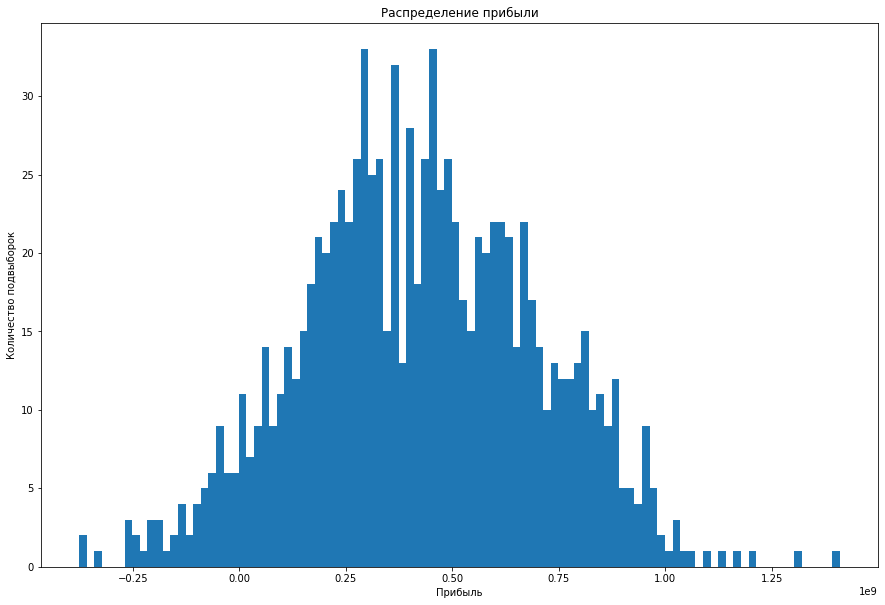

In [44]:
values.hist(bins=100, figsize=(15, 10))
plt.xlabel('Прибыль')
plt.ylabel('Количество подвыборок')
plt.grid(linewidth=0.5)
plt.title('Распределение прибыли')
plt.show()

In [45]:
print('Средняя возможная прибыль первого региона(в рублях):',values.mean())


Средняя возможная прибыль первого региона(в рублях): 425938526.91059244


In [46]:
confidence_interval = st.t.interval(
    0.95, len(values)-1,values.mean(),values.sem())

In [47]:
print('95%-ый доверительный интервал:',values.quantile(0.025),values.quantile(0.975))


95%-ый доверительный интервал: -102090094.83793654 947976353.3583689


In [48]:
print('Вероятность риска:{:.2%}'.format(loss_counter/1000))

Вероятность риска:6.00%


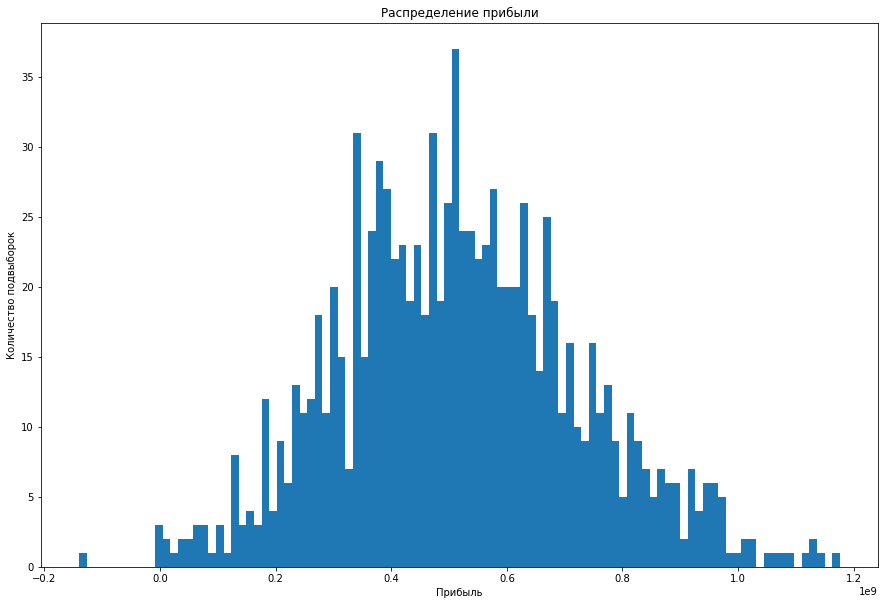

In [49]:
predictions = pd.Series(model2.predict(features_valid_df2), index=features_valid_df2.index)
values = []
loss_counter = 0
for i in range(1000):
        subsample_target = target_valid_df2.sample(n=explore, replace=True, random_state=state)
        subsample_predict = pd.Series(predictions)[subsample_target.index]

        profit = calculate_profit(subsample_target, subsample_predict, 200)

        values.append(profit)
        if (profit < 0):
            loss_counter += 1
values = pd.Series(values)
values.hist(bins=100, figsize=(15, 10))
plt.xlabel('Прибыль')
plt.ylabel('Количество подвыборок')
plt.grid(linewidth=0.5)
plt.title('Распределение прибыли')
plt.show()

In [50]:
print('Средняя возможная прибыль первого региона(в рублях):',values.mean())
print('95%-ый доверительный интервал:',values.quantile(0.025),values.quantile(0.975))

print('Вероятность риска:{:.2%}'.format(loss_counter/1000))

Средняя возможная прибыль первого региона(в рублях): 518259493.6973249
95%-ый доверительный интервал: 128123231.43308444 953612982.0669085
Вероятность риска:0.30%


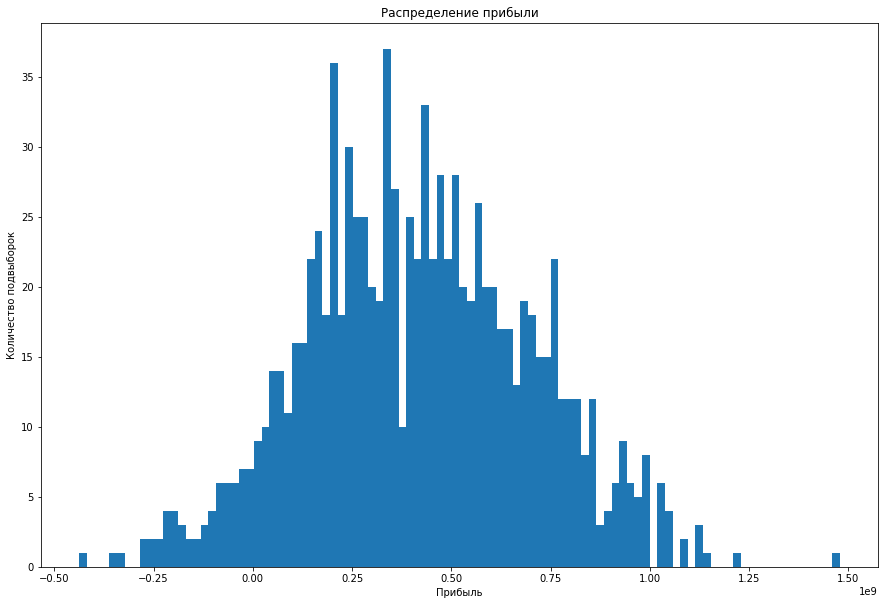

In [51]:
predictions = pd.Series(model3.predict(features_valid_df3), index=features_valid_df3.index)
values = []
loss_counter = 0
for i in range(1000):
        subsample_target = target_valid_df3.sample(n=explore, replace=True, random_state=state)
        subsample_predict = pd.Series(predictions)[subsample_target.index]

        profit = calculate_profit(subsample_target, subsample_predict, 200)

        values.append(profit)
        if (profit < 0):
            loss_counter += 1
values = pd.Series(values)
values.hist(bins=100, figsize=(15, 10))
plt.xlabel('Прибыль')
plt.ylabel('Количество подвыборок')
plt.grid(linewidth=0.5)
plt.title('Распределение прибыли')
plt.show()

In [52]:
print('Средняя возможная прибыль первого региона(в рублях):',values.mean())
print('95%-ый доверительный интервал:',values.quantile(0.025),values.quantile(0.975))

print('Вероятность риска:{:.2%}'.format(loss_counter/1000))

Средняя возможная прибыль первого региона(в рублях): 420194005.3440501
95%-ый доверительный интервал: -115852609.16001143 989629939.8445739
Вероятность риска:6.20%


## Вывод

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>В результате предварительной обработки данных, обучения моделей машинного обучения к каждой из таблиц, пришли к выводу, что единственным возможным регионом для разработки месторождений является второй. Потеря рисков на нем меньше 2,5% и, в отличие от остальных двух регионов, прибыль в нем значительно больше. </font>
</div>
